In [38]:
import json
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [2]:
with open('../JSON/MVP/final_mvp.json', 'r') as loadFile:
    data =  pd.DataFrame(json.load(loadFile))

In [4]:
data.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Share
0,LeBron James,SF,24,CLE,81.0,81.0,37.7,9.7,19.9,0.489,...,33.8,13.7,6.5,20.3,0.318,9.4,3.6,13.0,11.6,0.980
1,Kevin Durant,SF,20,OKC,74.0,74.0,39.0,8.9,18.8,0.476,...,28.3,5.2,2.7,7.9,0.132,2.2,-0.5,1.8,2.8,0.495
10,Chauncey Billups,PG,32,TOT,79.0,79.0,35.3,5.2,12.4,0.418,...,21.7,7.9,2.2,10.1,0.174,4.2,-1.7,2.5,3.2,0.001
100,Stephen Curry,PG,27,GSW,79.0,79.0,34.2,10.2,20.2,0.504,...,32.6,13.8,4.1,17.9,0.318,12.4,0.1,12.5,9.8,0.051
101,Giannis Antetokounmpo,PG,21,MIL,80.0,79.0,35.3,6.4,12.7,0.506,...,22.3,4.2,2.9,7.1,0.121,1.0,1.5,2.4,3.2,0.007


In [5]:
data.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'Share'],
      dtype='object')

In [6]:
X = data.drop(['Player', 'Pos', 'Tm', 'Share'], axis=1)

In [10]:
y = data['Share']

In [25]:
model = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)
model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

# 特徵重要性列表

In [32]:
feat_labels = X.columns
# print(feat_labels)
importances = model.feature_importances_
# print(importances)
indices = np.argsort(importances)[::-1]
# print(indices)
for feat in range(X.shape[1]):
    print("%d) %-*s %f" % (feat + 1, 30, feat_labels[indices[feat]], importances[indices[feat]]))

1) OWS                            0.074410
2) WS                             0.072959
3) VORP                           0.071688
4) WS/48                          0.053405
5) PER                            0.046792
6) PTS                            0.041923
7) FGA                            0.040725
8) PF                             0.039955
9) Age                            0.039888
10) BPM                            0.036607
11) MP                             0.032539
12) FG                             0.031086
13) 2P%                            0.027989
14) FTA                            0.025812
15) TOV%                           0.024271
16) TS%                            0.017811
17) eFG%                           0.017235
18) FTr                            0.016948
19) TOV                            0.016763
20) FT%                            0.016543
21) DWS                            0.016385
22) STL%                           0.014430
23) USG%                           0.0136

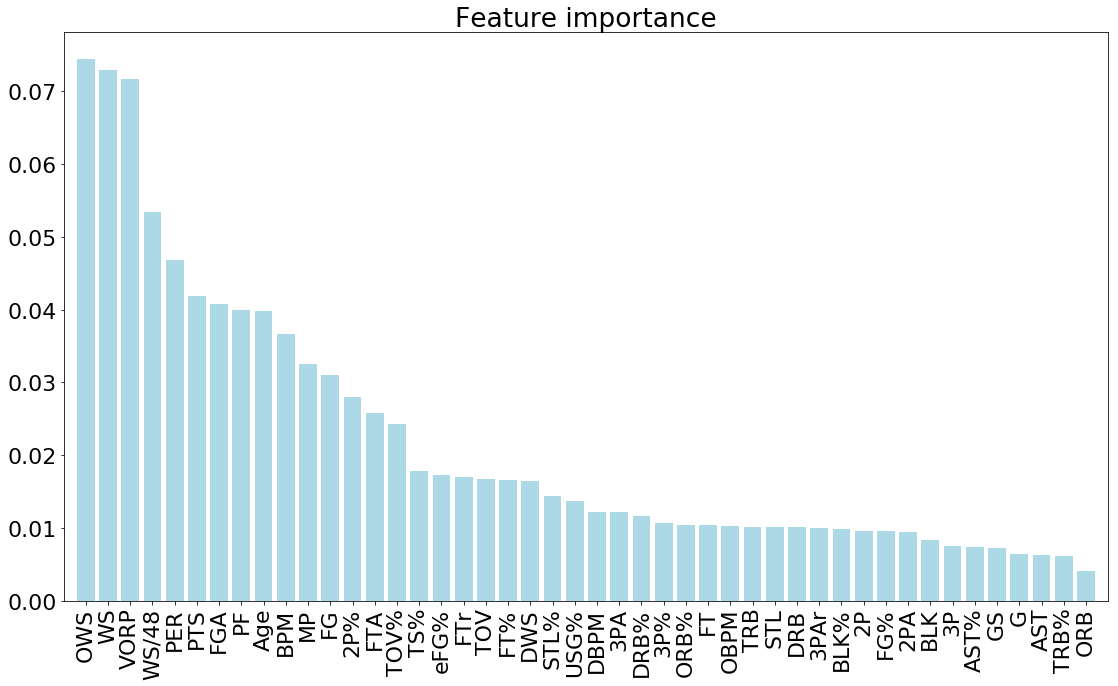

In [37]:
plt.figure(figsize=(16, 10))
plt.rcParams.update({'font.size': 22})
plt.title('Feature importance')
plt.bar(range(X.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(X.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

# 特徵 Heatmap

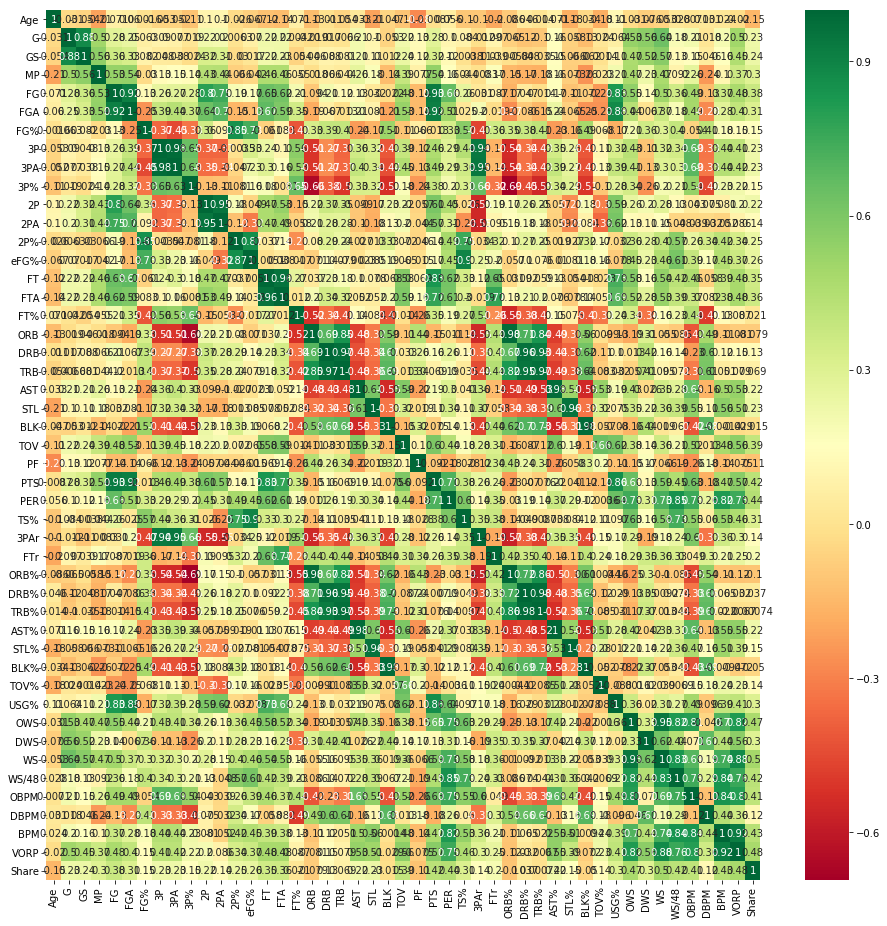

In [56]:
fig = plt.figure(figsize=(16, 16))
fig.set_facecolor('white')
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

# MVP Share分布圖

Text(0.5, 0, 'Award share')

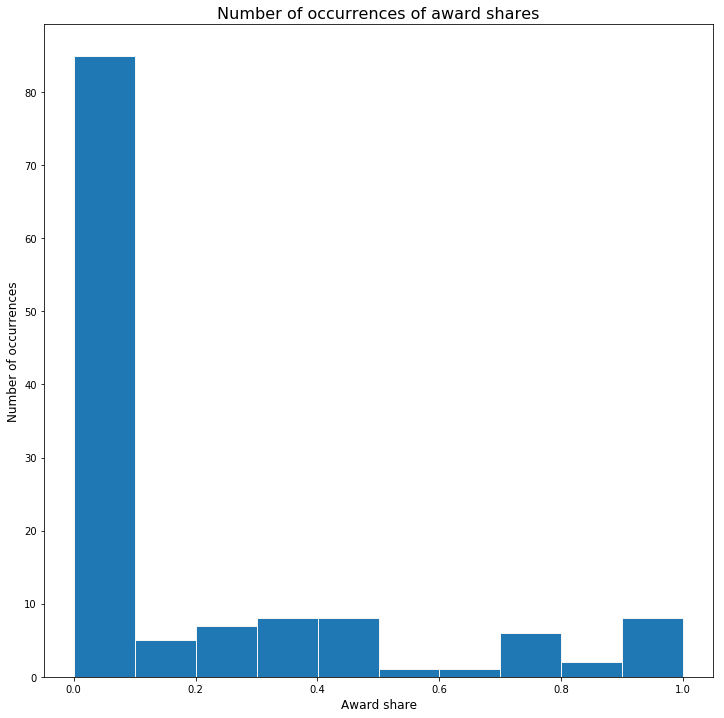

In [53]:
plt.figure(figsize=(12, 12))
plt.hist(data.Share, bins=10, edgecolor='#F5F5F5')
plt.title("Number of occurrences of award shares", size=16)
plt.ylabel("Number of occurrences", size=12)
plt.xlabel("Award share", size=12)

# 隨機森林調整參數

In [124]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [109]:
X = X[['OWS', 'WS', 'VORP', 'WS/48', 'PER', 'PTS', 'FGA', 'PF', 'Age', 'BPM']]

In [110]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [111]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [112]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [113]:
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [250]:
rfr = RandomForestRegressor(random_state=42)
pprint(rfr.get_params())

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [114]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.0min finished
C:\Users\ying\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [115]:
pprint(rf_random.best_params_)

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 800}


In [132]:
print(y_valid.shape[0])

40


In [316]:
def evaluate(model, X, y):
    pred = model.predict(X)
    accuracy = np.mean(abs(pred - y)/y)/40
    print('我算的' + str(accuracy))
    print('Accuracy = {:0.2f}%.'.format(100 * accuracy))
    return model.score(X, y)

In [317]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_valid, y_valid)

我算的0.5296624120103515
Accuracy = 52.97%.


In [121]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_valid, y_valid)

Accuracy = 42.20%.


In [123]:
print('Improvement of {:0.2f}%.'.format((random_accuracy - base_accuracy) / base_accuracy))

Improvement of -0.16%.


In [125]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [126]:
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [127]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  1.8min finished
C:\Users\ying\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 200}

In [128]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_valid, y_valid)

Accuracy = 41.76%.


# GradientBoostingRegressor

In [242]:
from sklearn.ensemble import GradientBoostingRegressor

In [246]:
gbr = GradientBoostingRegressor(random_state=42)
print('Parameters currently in use:\n')
pprint(gbr.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [251]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [252]:
grid_search_gbr = GridSearchCV(estimator = gbr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [253]:
# Fit the grid search to the data
grid_search_gbr.fit(X_train, y_train)
grid_search_gbr.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 327 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:   32.6s finished
C:\Users\ying\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 100}

In [256]:
best_grid_gbr = grid_search_gbr.best_estimator_
grid_accuracy = evaluate(best_grid_gbr, X_valid, y_valid)

我算的27.87250169209083
Accuracy = 26.42%.


# Linear Regression

In [257]:
from sklearn.linear_model import LinearRegression

In [259]:
lr = LinearRegression()
pprint(lr.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


In [260]:
lr.fit(X_train, y_train)
grid_accuracy = evaluate(lr, X_valid, y_valid)

我算的30.315000868061198
Accuracy = 41.67%.


# LogisticRegression

In [278]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [275]:
lor = LogisticRegression(random_state=42)
pprint(lor.get_params())

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [288]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'multi_class': ['multinomial'],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 500, 1000, 2000]
}

In [289]:
lor = LogisticRegression()
grid_search_lor = GridSearchCV(estimator = lor, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [293]:
# LogisticRegression需要另外做資料前處理
lab_enc = preprocessing.LabelEncoder()

In [294]:
# Fit the grid search to the data
grid_search_lor.fit(X_train, lab_enc.fit_transform(y_train))
grid_search_lor.best_params_

Fitting 3 folds for each of 96 candidates, totalling 288 fits


C:\Users\ying\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  1.5min finished
C:\Users\ying\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.001,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'solver': 'newton-cg'}

In [298]:
best_grid_lor = grid_search_lor.best_estimator_
grid_accuracy = evaluate(best_grid_lor, X_valid, y_valid)

我算的25.90681962211507


ValueError: Classification metrics can't handle a mix of continuous and binary targets

# SVC

In [299]:
from sklearn.svm import SVC

In [300]:
svc = SVC(random_state=42)
pprint(svc.get_params())

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [301]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10, 100],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'probability': [True]
}

In [302]:
svc= SVC()
grid_search_svc = GridSearchCV(estimator = svc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [304]:
# Fit the grid search to the data
grid_search_svc.fit(X_train, lab_enc.fit_transform(y_train))
grid_search_svc.best_params_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


C:\Users\ying\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.7s finished
C:\Users\ying\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 10, 'gamma': 0.0001, 'probability': True}

In [305]:
best_grid_svc = grid_search_svc.best_estimator_
grid_accuracy = evaluate(best_grid_svc, X_valid, y_valid)

我算的1.0


ValueError: Classification metrics can't handle a mix of continuous and binary targets